## Boundary

In [1]:
! pip install pykml
! pip install rioxarray
! pip install Shapely
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 79 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 9.2 MB/s 
     |████████████████████████████████| 6.3 MB 23.3 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=1edb891729a36470c545e985c516398acfde9d81edb10fd32494d1404fa3ed6b
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-py

In [2]:
from pykml import parser
import csv
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
kml_file = r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/image_cropping/CA_kml/cb_2018_06_tract_500k_0.kml"#,r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/image_cropping/CA_kml/cb_2018_06_tract_500k_1.kml", r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/image_cropping/CA_kml/cb_2021_06_tract_500k_2.kml"]

In [5]:
with open(kml_file) as f:
    folder = parser.parse(f).getroot().Document.Folder

In [ ]:
for i in folder.Placemark:
  try:
    print(i.ExtendedData.SchemaData.SimpleData[4].text)
  except:
    continue

Streaming output truncated to the last 5000 lines.
06037573300
06037573401
06037573402
06037573403
06037573601
06037573700
06037573800
06037573902
06037574000
06037574100
06037574201
06037574202
06037574300
06037574400
06037574500
06037574601
06037574602
06037574700
06037574800
06037574901
06037574902
06037575001
06037575002
06037575101
06037575102
06037575103
06037575201
06037575202
06037575300
06037575401
06037575402
06037575500
06037575801
06037575802
06037575803
06037575901
06037575902
06037576001
06037576200
06037576301
06037576302
06037576401
06037576402
06037576403
06037576501
06037576502
06037576503
06037576601
06037576602
06037576700
06037576801
06037576802
06037576901
06037576903
06037576904
06037577000
06037577100
06037577200
06037577300
06037577400
06037577501
06037577504
06037577602
06037577603
06037577604
06037599000
06037599100
06037600100
06037600201
06037600202
06037600302
06037600303
06037600304
06037600400
06037600501
06037600502
06037600601
06037600602
06037600702
0

In [6]:
boundary_result = {}

for pm in folder.Placemark:
    try:
        cor_text = pm.Polygon.outerBoundaryIs.LinearRing.coordinates.text
        geo_id = pm.ExtendedData.SchemaData.SimpleData[4].text
        cor_text_lst = cor_text.replace('0.0','').rstrip(',').split(',')
        pointer0 = 0
        pointer1 = 1
        cor_lst = []

        for i in range(len(cor_text_lst)):
            if i + pointer0 <= len(cor_text_lst) - 2:
                cor_lst.append((float(cor_text_lst[i+pointer0]), float(cor_text_lst[i+pointer1])))
                pointer0 += 1
                pointer1 += 1
        boundary_result[geo_id] = cor_lst
    except:
        pass

In [7]:
len(boundary_result)

8024

In [8]:
boundary_result

{'06001400100': [(-122.24692, 37.885438),
  (-122.246833, 37.884106),
  (-122.246439, 37.881203),
  (-122.245156, 37.869737),
  (-122.244877, 37.866276),
  (-122.245338, 37.865986),
  (-122.245525, 37.864036),
  (-122.244065, 37.860776),
  (-122.244505, 37.859129),
  (-122.242347, 37.85761),
  (-122.241715, 37.857248),
  (-122.241154, 37.857262),
  (-122.234761, 37.85779),
  (-122.234185, 37.852543),
  (-122.234084, 37.852518),
  (-122.231291, 37.850839),
  (-122.226748, 37.849962),
  (-122.224196, 37.851016),
  (-122.22356, 37.852172),
  (-122.224047, 37.853575),
  (-122.223451, 37.85511),
  (-122.221609, 37.855291),
  (-122.222621, 37.857711),
  (-122.22108, 37.860114),
  (-122.219371, 37.859413),
  (-122.219349, 37.857728),
  (-122.216737, 37.856199),
  (-122.213584, 37.855977),
  (-122.21238, 37.857234),
  (-122.213196, 37.857601),
  (-122.214736, 37.85951),
  (-122.220389, 37.864427),
  (-122.221488, 37.865026),
  (-122.219181, 37.867226),
  (-122.216276, 37.868822),
  (-122.21737

In [10]:
from shapely.geometry import Polygon
dic = {'tract_id':[],'area':[]}
for k,v in boundary_result.items():
  dic['tract_id'].append(k)
  dic['area'].append(Polygon(v).area)

In [11]:
df = pd.DataFrame(dic)
df

,tract_id,area
0,06001400100,0.000708
1,06001400200,0.000059
2,06001400300,0.000113
3,06001400400,0.000074
4,06001400500,0.000060
...,...,...
8019,06115040800,0.011399
8020,06115040901,0.027930
8021,06115040902,0.009781
8022,06115041000,0.049605


In [13]:
%cd /content/drive/My Drive/Colab Notebooks/object_detection/

/content/drive/My Drive/Colab Notebooks/object_detection


In [14]:
df.to_csv('la_tract_area.csv',index=False)

## Plot one instance

In [ ]:
tract_geo = '06037980015'
poly = boundary_result[tract_geo]

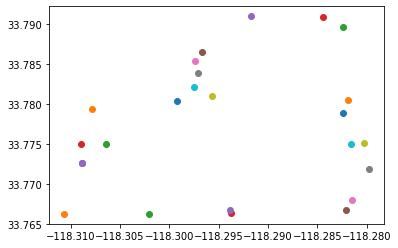

In [ ]:
for i, j in poly:
    plt.scatter(i, j)

In [ ]:
poly

[(-118.308833, 33.772616),
 (-118.310652, 33.76623),
 (-118.302111, 33.766241),
 (-118.293812, 33.766301),
 (-118.293874, 33.766759),
 (-118.282081, 33.766744),
 (-118.281494, 33.767963),
 (-118.279816, 33.771896),
 (-118.280282, 33.775085),
 (-118.281631, 33.775012),
 (-118.282465, 33.778881),
 (-118.281884, 33.780447),
 (-118.282391, 33.78961),
 (-118.284481, 33.790848),
 (-118.291703, 33.790992),
 (-118.296676, 33.786552),
 (-118.297402, 33.785369),
 (-118.297106, 33.783933),
 (-118.295654, 33.781028),
 (-118.297492, 33.78208),
 (-118.299216, 33.780363),
 (-118.307826, 33.779328),
 (-118.306427, 33.774958),
 (-118.308923, 33.774964),
 (-118.308833, 33.772616)]

In [ ]:
# calculate polygon areas

from shapely.geometry import Polygon
pgon = Polygon(poly) # Assuming the OP's x,y coordinates

print(pgon.area)

0.000521296582500011


In [ ]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [ ]:
x1 = [x for x,y in poly]
y1 = [y for x,y in poly]


In [ ]:
PolyArea(x1,y1)

0.0005212965843384154

In [ ]:
# top_lat = max(poly, key=lambda  x:x[1])[1]
# bottom_lat = min(poly, key=lambda x:x[1])[1]
# right_lon = max(poly, key=lambda  x:x[0])[0]
# left_lon = min(poly, key=lambda  x:x[0])[0]

In [ ]:
# print(left_lon, right_lon, top_lat, bottom_lat)

In [ ]:
# plt.scatter(right_lon, top_lat)
# plt.scatter(left_lon, bottom_lat)

## Crop the images

In [ ]:
import os
import rioxarray
import geopandas as gpd
from shapely.geometry import Polygon
import cv2

In [ ]:
path = r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/LA/raw"
destination = r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/LA/cropped"

In [ ]:
categories = os.listdir(path)

In [ ]:
large_image = ['06037300701.png','06037300702.png','06037400205.png','06037403325.png','06037408202.png','06037430301.png','06037670602.png','06037800102.png','06037800202.png','06037800329.png','06037800330.png','06037800406.png','06037800408.png','06037800410.png','06037800504.png','06037800506.png','06037800326.png','06037901205.png','06037901210.png','06037901213.png','06037910205.png','06037910804.png','06037910808.png','06037910810.png','06037920012.png','06037920043.png','06037920303.png','06037920339.png','06037980019.png','06037980031.png']

In [ ]:
error_img = []

for c in categories:
  imgs = os.path.join(path, c)
  for img in os.listdir(imgs):
    # crop each image
    png = img.strip('.tif') + '.png'
    #png1 has too 2 polygon and png2 is too large to crash
    #ps: 06037430301 is around 500mb
    if png in os.listdir(os.path.join(destination, c)) or png == '06037576602.png' or png in large_image:
      continue
    try:
      print(png)
      raster = rioxarray.open_rasterio(os.path.join(imgs, img))
      polygon_geom = Polygon(boundary_result[img.strip('.tif')])
      polygon = gpd.GeoDataFrame(index=[0], crs=raster.rio.crs, geometry=[polygon_geom])
      raster_clip_polygon = raster.rio.clip(polygon['geometry'], polygon.crs)
      # save each image
      img_np = raster_clip_polygon.to_numpy()
      img_arr = np.moveaxis(img_np, 0, -1)
      folder = os.path.join(destination, c)
      cv2.imwrite(os.path.join(folder, img.strip('.tif') + '.png'), cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR))
    except:
      error_img.append(os.path.join(imgs, img))
      pass

In [ ]:
len(os.listdir(os.path.join(destination, categories[0])))

273

In [ ]:
len(os.listdir(os.path.join(destination, categories[1])))

1394

In [ ]:
len(os.listdir(os.path.join(path, categories[0])))

273

In [ ]:
len(os.listdir(os.path.join(path, categories[1])))

1425

In [ ]:
1425-1394

31

In [ ]:
len(large_image)

30

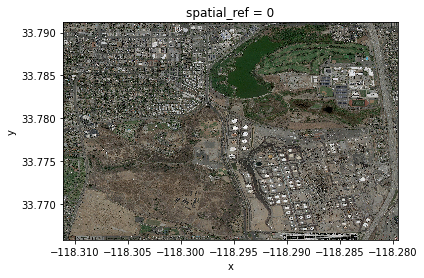

In [ ]:
import rioxarray

# Load image and visualize
raster = rioxarray.open_rasterio(r"/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/LA/raw/non-gentrified/06037980015.tif")
raster.plot.imshow()

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

In [ ]:
polygon_geom = Polygon(poly)

In [ ]:
polygon = gpd.GeoDataFrame(index=[0], crs=raster.rio.crs, geometry=[polygon_geom])

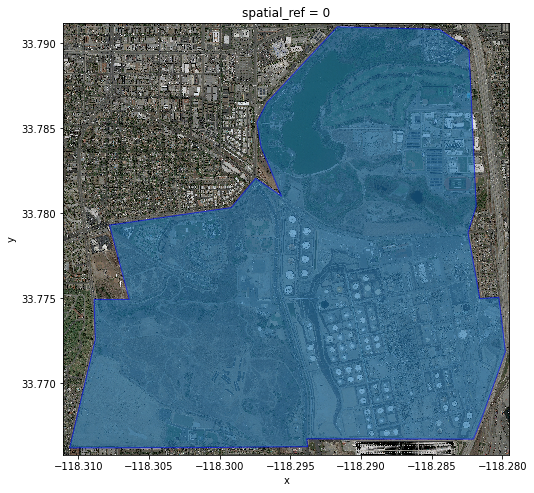

In [ ]:
# Plot the polygon over raster
fig, ax = plt.subplots()
fig.set_size_inches((8,8))
raster.plot.imshow(ax=ax)
polygon.plot(ax=ax, edgecolor='blue', alpha=0.6)

In [ ]:
# # Crop and visualize
# raster_clip_polygon = raster.rio.clip(polygon['geometry'], polygon.crs)
# raster_clip_polygon.plot.imshow(figsize=(10,5))

## Save the cropped image

In [ ]:
# type(raster_clip_polygon)

In [ ]:
# # change the data to numpy array

# img_np = raster_clip_polygon.to_numpy()
# type(img_np), img_np.shape

In [ ]:
# # reshape the data to make the channel at the last axis

# img_arr = np.moveaxis(img_np, 0, -1)
# img_arr.shape

In [ ]:
# # save the numpy array to image file

# import cv2

# cv2.imwrite('test.png', cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR))